<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
/var/folders/_p/jv0my49j2rb9n_lvg5f27l0r0000gn/T/ipykernel_17547/1231371212.py:15: SyntaxWarning: invalid escape sequence '\c'
  function_names = ['$f_1(x) = sin(x) + 0.1 \cdot x^2$', '$f_2(x) = exp(-x^2) + 0.5 \cdot cos(3x)$']
/var/folders/_p/jv0my49j2rb9n_lvg5f27l0r0000gn/T/ipykernel_17547/1231371212.py:15: SyntaxWarning: invalid escape sequence '\c'
  function_names = ['$f_1(x) = sin(x) + 0.1 \cdot x^2$', '$f_2(x) = exp(-x^2) + 0.5 \cdot cos(3x)$']


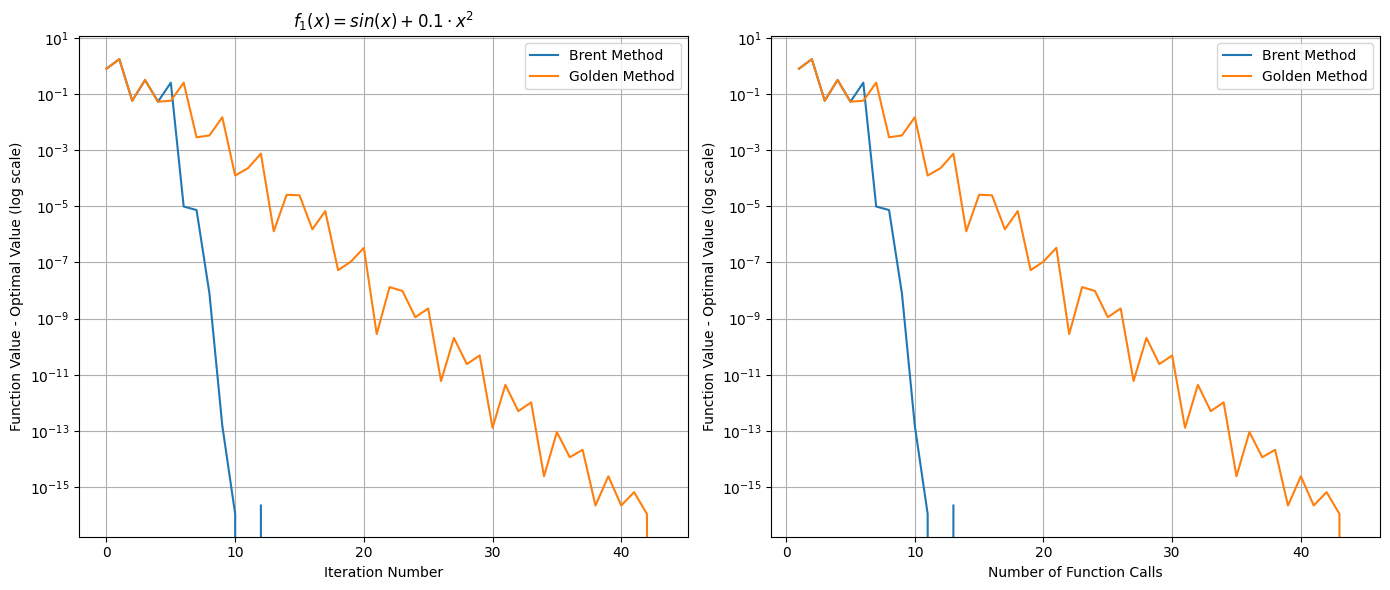

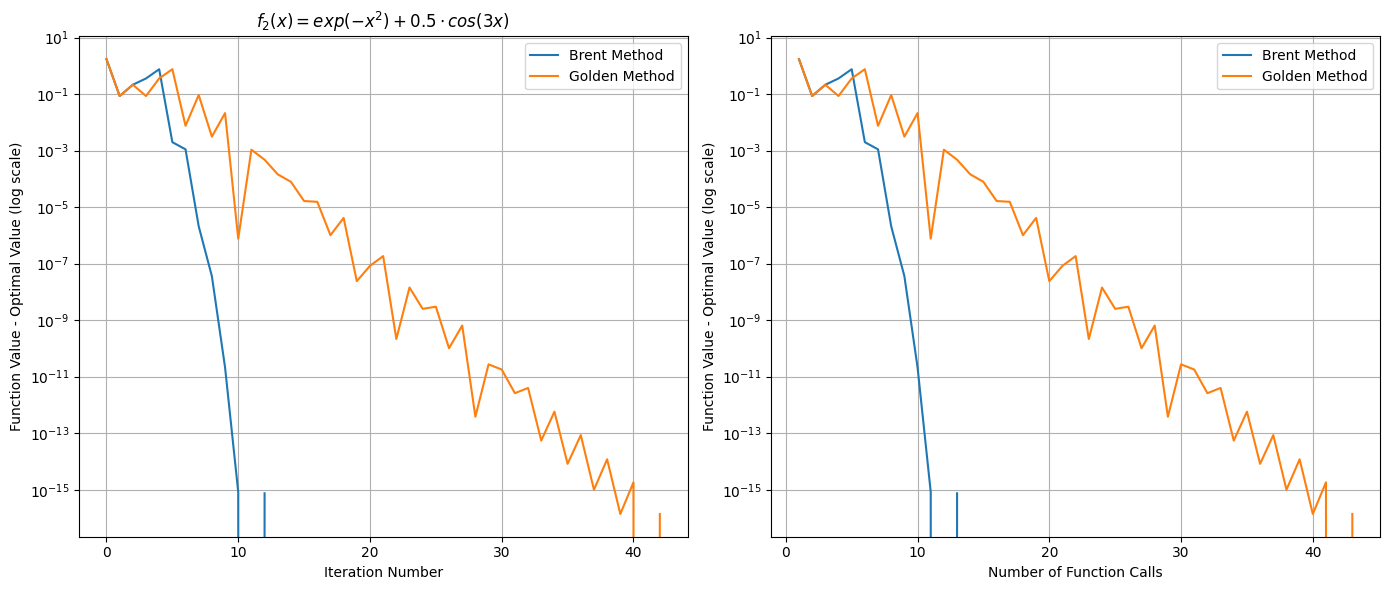

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define two test functions
def f1(x):
    return np.sin(x) + 0.1 * (x ** 2)

def f2(x):
    return np.exp(-x**2) + 0.5 * np.cos(3 * x)

# Optimization settings
methods = ['brent', 'golden']
functions = [f1, f2]
function_names = ['$f_1(x) = sin(x) + 0.1 \cdot x^2$', '$f_2(x) = exp(-x^2) + 0.5 \cdot cos(3x)$']

# Store results for plotting
results = {}

for func, func_name in zip(functions, function_names):
    results[func_name] = {}
    for method in methods:
        function_call_values = []

        # Wrap the function to track calls
        def wrapped_func(x):
            value = func(x)
            function_call_values.append(value)
            return value

        result = minimize_scalar(wrapped_func, method=method)

        # Collect data for plotting
        results[func_name][method] = {
            'function_values': function_call_values,
            'num_calls': len(function_call_values),
            'x_min': result.x,
            'fun_min': result.fun
        }

# Plot results
for i, func_name in enumerate(function_names):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot function value vs. iteration number
    for method in methods:
        axes[0].plot(
            range(len(results[func_name][method]['function_values'])),
            [fv - results[func_name][method]['fun_min'] for fv in results[func_name][method]['function_values']],
            label=f'{method.capitalize()} Method'
        )
    axes[0].set_yscale('log')
    axes[0].set_title(f'{func_name}')
    axes[0].set_xlabel('Iteration Number')
    axes[0].set_ylabel('Function Value - Optimal Value (log scale)')
    axes[0].legend()
    axes[0].grid()

    # Plot function value vs. number of function calls
    for method in methods:
        axes[1].plot(
            range(1, results[func_name][method]['num_calls'] + 1),
            [fv - results[func_name][method]['fun_min'] for fv in results[func_name][method]['function_values']],
            label=f'{method.capitalize()} Method'
        )
    axes[1].set_yscale('log')
    # axes[1].set_title(r'{func_name}')
    axes[1].set_xlabel('Number of Function Calls')
    axes[1].set_ylabel('Function Value - Optimal Value (log scale)')
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.show()